# real-estate-2

## Abstract

Previously, a dataset that icnludes property attributes had been filtered and used in a ridge regression model to estimate the sale prices. The model was good in accuracy, but had a fairly low R^2 value. In this notebook, the cleaned data was used in a Support vector regression model to improve fit. The resulting error is ~ 20% lower and the R^2 has improved by ~ 30%. The next steps would be to compare model complexity using advanced criteria, such as the AIC, but that which is specifically designed for SVR models [1]


## Scope and Objectives

In light of the extended deadline, it was decided that this real-estate problem would be tackled using a different approach. This allowed time for the author to improve upon a number of things:

1) add a requirements.txt file

2) explore using SVR instead of ridge-regression to see if the fit can be improved

# Libraries


In [2]:
# mathematical
import numpy as np

# data storage / analysis
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


# evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

In [3]:
# import data
df = pd.read_csv('Data/data_reduced.csv',index_col = 0)
df.head()

,OverallQual,OverallCond,BsmtUnfSF,2ndFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,BsmtFinSF1_sqrt,TotalBsmtSF_sqrt,...,GarageYrBlt_2207.0,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.067254,-0.506718,-0.269105,-0.783185,-1.024793,0.354167,2.162180,0.256673,0.656676,0.253952,...,0,1,0,0,0,0,0,0,1,0
1,-0.776079,0.393091,-0.658319,-0.783185,-1.024793,-0.917535,-0.925143,1.196325,0.236136,0.620509,...,0,0,0,1,0,0,0,0,1,0
2,-0.067254,0.393091,-0.348769,-0.783185,-1.024793,-0.281684,-0.925143,-0.748103,1.027035,0.793601,...,0,0,0,1,0,0,0,0,1,0
4,-0.776079,-0.506718,-0.961040,0.853432,0.784028,-0.281684,0.618518,0.042693,0.874625,0.529714,...,0,1,0,0,0,0,0,0,1,0
5,-0.067254,0.393091,-0.535409,0.799734,0.784028,0.354167,0.618518,-0.013128,0.591593,0.533983,...,0,1,0,0,0,0,0,0,1,0


In [77]:
# prepare model
X = df[df.columns[df.columns != 'SalePrice_sqrt']]
y = df['SalePrice_sqrt']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [78]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [79]:
yhat = model.predict(X_test)

/Users/yousefnami/python_environments/ICDSS_Challenges/real-estate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


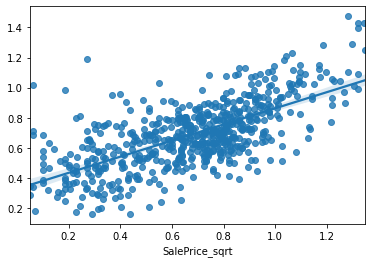

In [80]:
sns.regplot(y_test, yhat)
plt.show()

In [81]:
r2_score(y_test,yhat)

0.4333815773489953

In [82]:
MAE(y_test, yhat)

0.15970562498975802

For an initial use of the SVR, the error / r^2 seems to be comparable to that of the ridge regression method used before. However, using different Kernels may provide us with better results.

# Optimise model

In [83]:
kernels = ['linear', 'poly', 'rbf']
# parameters to care for, polynomial order, C, and epsilon
R2 = []
MAE_val = []
models = []
params = []
for p, kernel in enumerate(kernels):
    params.append([0,0,0])
    models.append(0)
    R2.append(0)
    MAE_val.append(1)
    model = SVR(kernel = kernel)
    for i in range(10,30,1000):
        model.set_params(C = i/100)
        for j in range(0,10,100):
            model.set_params(epsilon = j/100)
            if kernel == 'poly':
                for k in range(2,10):
                    model.set_params(degree = k)
                    model.fit(X_train, y_train)
                    yhat = model.predict(X_test)
                    if r2_score(y_test,yhat) > R2[p] and MAE(y_test, yhat) < MAE_val[p]:
                        R2[p] = r2_score(y_test,yhat)
                        MAE_val[p] = MAE(y_test, yhat)
                        models[p] = yhat
                        params[p] = ['C={}'.format(i/100),
                                     'epsilon={}'.format(j/100),
                                     'poly={}'.format(k)]
            else:
                model.fit(X_train, y_train)
                yhat = model.predict(X_test)
                if r2_score(y_test,yhat) > R2[p] and MAE(y_test, yhat) < MAE_val[p]:
                    R2[p] = r2_score(y_test,yhat)
                    MAE_val[p] = MAE(y_test, yhat)
                    models[p] = yhat
                    params[p] = ['C={}'.format(i/100),
                                 'epsilon={}'.format(j/100),
                                 '{}'.format(kernel)]
        

/Users/yousefnami/python_environments/ICDSS_Challenges/real-estate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.4590178703126575 0.15352293851656354


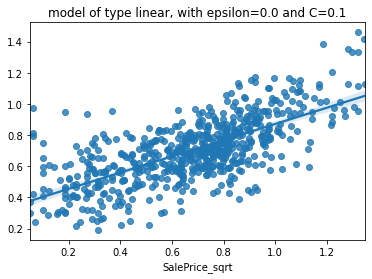

/Users/yousefnami/python_environments/ICDSS_Challenges/real-estate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.6275124971160821 0.1278093054810809


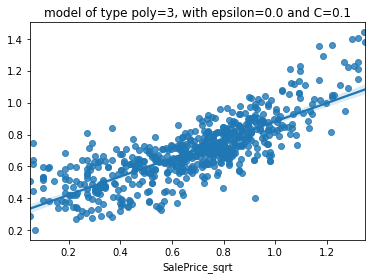

/Users/yousefnami/python_environments/ICDSS_Challenges/real-estate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.6170687020609169 0.1280774948175055


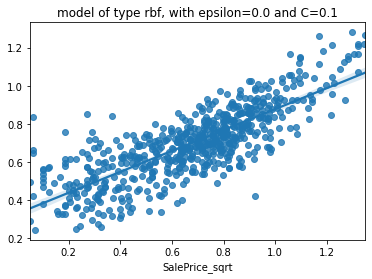

In [84]:
for y_curr, Rsquared, Merror, parameters in zip(models, R2, MAE_val,params):
    sns.regplot(y_test, y_curr)
    print(Rsquared,Merror)
    plt.title('model of type {2}, with {1} and {0}'.format(*parameters))
    plt.show()

Based on this, one might argue that the best model is indeed the 'rbf' model, with a epsilon  = 0 and C = 0.1.

This is, at least, an improvement from the previous ridge regression model, both in terms of the MSE and the R^2. It's interesting however that the epsilon value for all 3 was the 0 one. This seems a bit dubious, so further exploration is necessary.

In fact, according to online sources, the value of epsilon affects the overfitting / underfitting capability of the curve [2]. With that in mind, epsilon = 0 is most certainly an overfit, and though it performs well on this particular test set, it may not to so more generally.

# Test robustness of model

In [85]:
model = SVR(kernel = 'rbf', epsilon = 0, C = 0.1)

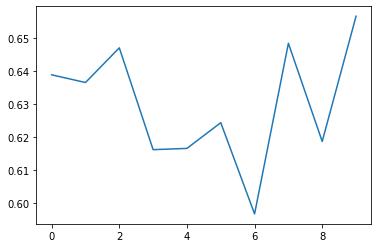

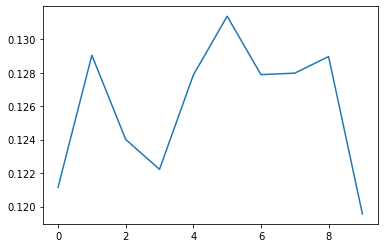

In [86]:
R2s = []
MAEs = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
    model.fit(X_train,y_train)
    yhat = model.predict(X_test)
    R2s.append(r2_score(y_test,yhat))
    MAEs.append(MAE(y_test, yhat))

plt.plot([i for i in range(10)],R2s)
plt.show()
plt.plot([i for i in range(10)],MAEs)
plt.show()


Based on the above, it seems that epsilon = 0 has little effect on the accuracy of the model, despite the fact that it overfits. This is still not convincing, and perhaps requires more sophisticated methods of analysis to find the root cause.

# References
1. https://www.jmlr.org/papers/volume9/claeskens08a/claeskens08a.pdf
2. https://www.researchgate.net/post/What_is_the_problem_with_epsilon0_in_regression_problems_with_Support_Vector_Regression2